___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 6</p><h1>

# Missing Values & Outliers

- # Handling with Missing Values

**Missing value handling methods**

 1. <b>Deleting Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[5, np.nan, np.nan],
                  'C':[1, 2, 3]})

In [3]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


NaN, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

NaN is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [4]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [5]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [13]:
df.dropna(thresh=3,axis=1)

,C
0,1
1,2
2,3


In [9]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [10]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [12]:
import numpy as np
import pandas as pd
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])
df = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}        
)

df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [13]:
# what percent of the variables have missing values

df.isnull().sum()

Var1    2
Var2    3
Var3    2
dtype: int64

In [14]:
len(df)

9

In [15]:

df.isnull().sum()/len(df)

Var1    0.222222
Var2    0.333333
Var3    0.222222
dtype: float64

In [16]:
df.notnull().sum()

Var1    7
Var2    6
Var3    7
dtype: int64

In [17]:
df.isnull().sum().sum()

7

In [18]:
df.Var1.isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: Var1, dtype: bool

In [19]:
df.Var1[df.Var1.isnull()]

3   NaN
6   NaN
Name: Var1, dtype: float64

In [20]:
df.isnull()

,Var1,Var2,Var3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [21]:
# columns/variables containing any missing values

df.isnull().any()

Var1    True
Var2    True
Var3    True
dtype: bool

In [22]:
#number of missing values in the columns

df.isnull().sum()

Var1    2
Var2    3
Var3    2
dtype: int64

In [23]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [24]:
df.isnull().any(axis = 1)

0     True
1     True
2    False
3     True
4    False
5     True
6     True
7    False
8    False
dtype: bool

In [25]:
# rows containing any missing values

df[df.isnull().any(axis = 1)]

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [26]:
# rows containing full of notnull values

df[df.notnull().all(axis = 1)]

,Var1,Var2,Var3
2,5.0,5.0,5.0
4,7.0,11.0,13.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [27]:
# rows containing full of notnull values using "~"

df[~df.isnull().any(axis = 1)]

,Var1,Var2,Var3
2,5.0,5.0,5.0
4,7.0,11.0,13.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [28]:
df[df.Var1.notnull() & df.Var2.notnull() & df.Var3.notnull()]

,Var1,Var2,Var3
2,5.0,5.0,5.0
4,7.0,11.0,13.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


### Missing Values Handling Methods

 - #### Dropping

In [29]:
# removing all rows containing any missing value

df.dropna()

,Var1,Var2,Var3
2,5.0,5.0,5.0
4,7.0,11.0,13.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [30]:
# it does not change the original df

df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [31]:
# index 6 is removed since its all values are missing.

df.dropna(how = "all")

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [32]:
# it removes the columns which contains any (at least one missing value)
# missing value

df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [33]:
# there is no dropping column since no column has full of missing value

df.dropna(axis = 1, how = "all")

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [34]:
# let's create a column containing full of missing value

df["delete_me"] = np.nan

In [35]:
df

,Var1,Var2,Var3,delete_me
0,2.0,8.0,NaN,NaN
1,3.0,NaN,13.0,NaN
2,5.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,11.0,13.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,10.0,2.0,3.0,NaN
8,14.0,3.0,30.0,NaN


In [36]:
# now let's drop the comlumn containing full of missing value

df.dropna(axis = 1, how = "all", inplace = True)

In [37]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


### 👉[Dropping Missing Values](http://localhost:8888/notebooks/pythonic/DAwPythonSessions/w3resource-pandas-dataframe-dropna.ipynb)

 - #### Filling

In [61]:
import numpy as np
import pandas as pd
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])
df = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}        
)

df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [62]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


 - Filling with a specific value

In [63]:
df["Var1"]

0     2.0
1     3.0
2     5.0
3     NaN
4     7.0
5     1.0
6     NaN
7    10.0
8    14.0
Name: Var1, dtype: float64

In [64]:
df["Var1"].fillna(0)

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

 - Filling with any Proper Value

In [65]:
type(np.nan)

float

In [66]:
df["Var1"].mean()

6.0

In [67]:
df["Var1"].fillna(df["Var1"].mean())

0     2.0
1     3.0
2     5.0
3     6.0
4     7.0
5     1.0
6     6.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [68]:
# filling all columns/variables using Method - 1

df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [73]:
# filling all columns/variables using Method - 2

df.mean()[:]

Var1     6.000000
Var2     6.166667
Var3    11.000000
dtype: float64

In [47]:
df.fillna(df.mean()[:])

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [48]:
# we can fill Var1 with avg of Var1 and fill Var2 with avg of Var2

df.mean()["Var1":"Var2"]

Var1    6.000000
Var2    6.166667
dtype: float64

In [49]:
df.fillna({"Var1": 6, "Var2":6.16})

,Var1,Var2,Var3
0,2.0,8.00,NaN
1,3.0,6.16,13.0
2,5.0,5.00,5.0
3,6.0,8.00,6.0
4,7.0,11.00,13.0
5,1.0,6.16,7.0
6,6.0,6.16,NaN
7,10.0,2.00,3.0
8,14.0,3.00,30.0


In [51]:
df.fillna(df.mean()["Var1":"Var2"])

,Var1,Var2,Var3
0,2.0,8.000000,NaN
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [52]:
df["Var3"].fillna(df["Var3"].median())

0     7.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6     7.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [53]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [54]:
pd.notna(df)

,Var1,Var2,Var3
0,True,True,False
1,True,False,True
2,True,True,True
3,False,True,True
4,True,True,True
5,True,False,True
6,False,False,False
7,True,True,True
8,True,True,True


In [55]:
df.where(pd.notna(df), df.mean(), axis = 1)

# df.where(pd.notna(df), df.mean(), axis = "columns")

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [56]:
df.notnull()

,Var1,Var2,Var3
0,True,True,False
1,True,False,True
2,True,True,True
3,False,True,True
4,True,True,True
5,True,False,True
6,False,False,False
7,True,True,True
8,True,True,True


 - Filling with any Proper Value Regarding to Group of the Categorical Variables 

In [57]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])

df = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}        
)

df

,salary,Var2,Var3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IT
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,9.0,NaN,NaN,HR
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [58]:
#regarding to avg of "maas" in terms of "department"

df.groupby("department")["salary"].mean()

department
HR    5.666667
IT    6.250000
Name: salary, dtype: float64

In [59]:
# pay attention to index:3 and index:7
# pay attention to key:3 and key:7 of the dict 

df.salary.fillna({0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9})

0     1.0
1     3.0
2     6.0
3     4.0
4     7.0
5     1.0
6     9.0
7     8.0
8    15.0
Name: salary, dtype: float64

In [60]:
# we transformed the values of "salary" column into group average.

df.groupby("department")["salary"].transform("mean")  # take a look at the .transform()

0    6.250000
1    6.250000
2    6.250000
3    5.666667
4    5.666667
5    5.666667
6    5.666667
7    6.250000
8    6.250000
Name: salary, dtype: float64

In [61]:
df["salary"].fillna(df.groupby("department")["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

 - Filling the Missing Values of Categorical Values

In [74]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)

df = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}        
)

df

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [75]:
df["department"].mode()

0    HR
dtype: object

In [76]:
df["department"].fillna(df["department"].mode()[0])

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [77]:
df

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [78]:
df["department"].fillna(method = "bfill")

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [79]:
df["department"].fillna(method = "ffill")

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [80]:
df

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [81]:
df.interpolate()

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,6.5,HR
4,7.0,HR
5,1.0,HR
6,5.0,NaN
7,9.0,IT
8,15.0,HR


In [84]:
df_new=df.append(df.loc[6])
df_new

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR
6,NaN,NaN


In [83]:
df_new.interpolate()

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,6.5,HR
4,7.0,HR
5,1.0,HR
6,5.0,NaN
7,9.0,IT
8,15.0,HR
6,15.0,NaN


### 👉[`.fillna()`](http://localhost:8888/notebooks/pythonic/DAwPythonSessions/w3resource-pandas-dataframe-fillna.ipynb)

https://s3.amazonaws.com/assets.datacamp.com/production/course_19853/slides/chapter1.pdf

 - # Handling with Outliers

<b>Outliers</b> are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are

## Catching and Detecting Outliers

In [85]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='table'>

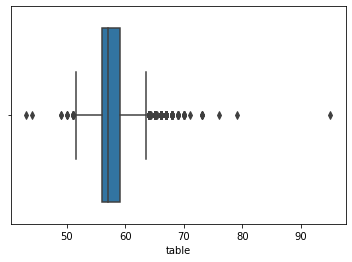

In [20]:
# you don't need to know how this plotting happens.
# just focus on quarters
# remember Statistics lesson IQR

sns.boxplot(x = df.table)

In [21]:
df_table = df["table"]

In [22]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [23]:
pd.DataFrame(df_table).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   table   53940 non-null  float64
dtypes: float64(1)
memory usage: 842.8 KB


In [24]:
len(df_table)

53940

## Tukey's Fences | Tukey's Rule

- First way of specifying ``Q1 & Q3`` is using the ``.quantile()`` method

In [25]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [26]:
Q1

56.0

In [27]:
Q3

59.0

In [28]:
IQR

3.0

- Second way of specifying ``Q1 & Q3`` is using the ``.describe()`` method

In [29]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [30]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [31]:
lower_lim

51.5

In [32]:
upper_lim

63.5

In [33]:
(df_table < lower_lim)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [34]:
(df_table > upper_lim)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [35]:
outliers_15_low = (df_table < lower_lim)

In [36]:
outliers_15_up = (df_table > upper_lim)

In [37]:
len(df_table[outliers_15_low])

16

In [38]:
len(df_table[outliers_15_up])

589

In [39]:
len(df_table) - (len(df_table[outliers_15_low]) + len(df_table[outliers_15_up]))

53335

In [40]:
# the outliers according to the 1.5 

df_table[(outliers_15_low | outliers_15_up)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [41]:
lower_lim = Q1 - 2.5 * IQR
upper_lim = Q3 + 2.5 * IQR

In [42]:
lower_lim

48.5

In [43]:
upper_lim

66.5

In [44]:
(df_table < lower_lim) | (df_table > upper_lim)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [45]:
outliers_25 = (df_table < lower_lim) | (df_table > upper_lim)

In [46]:
# the outliers according to the 2.5 

df_table[outliers_25]

91       69.0
227      67.0
314      70.0
359      68.0
526      67.0
         ... 
52860    73.0
52861    73.0
53064    68.0
53542    67.0
53660    67.0
Name: table, Length: 91, dtype: float64

### Removing the Outliers

In [47]:
# "table" column without outliers

df_table[~(outliers_15_low | outliers_15_up)]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [48]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

not_outliers_15 = (df_table >= lower_lim) & (df_table <= upper_lim)

In [49]:
df_table[not_outliers_15]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [50]:
cleaned_df = df[not_outliers_15]

In [51]:
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Limitation and Transformation of the Outliers

- ### Limitation using ``.winsorize()`` method

In [52]:
from scipy.stats.mstats import winsorize

In [53]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [54]:
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

<AxesSubplot:xlabel='table'>

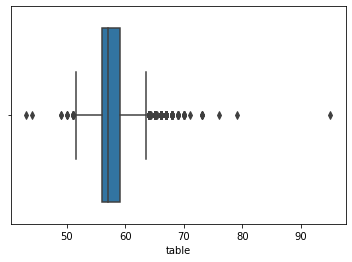

In [55]:
sns.boxplot(x = df_table)

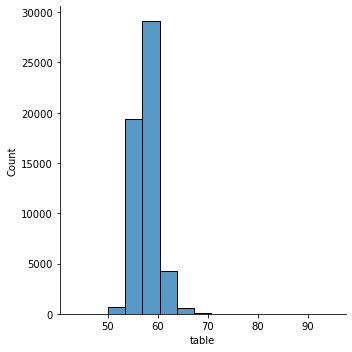

In [56]:
sns.displot(df_table, bins = 15, kde = False)

In [57]:
df_table_win = winsorize(df_table, (0.01, 0.02))

In [117]:
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

<AxesSubplot:>

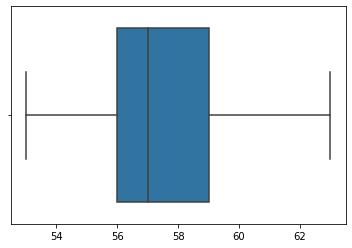

In [118]:
sns.boxplot(x = df_table_win)

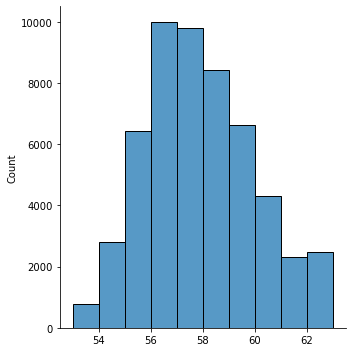

In [119]:
sns.displot(df_table_win, bins = 10, kde =False)

In [120]:
pd.DataFrame(df_table_win)

,0
0,55.0
1,61.0
2,63.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [121]:
pd.DataFrame(df_table_win)[0]

0        55.0
1        61.0
2        63.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: 0, Length: 53940, dtype: float64

In [122]:
df_table_win = pd.DataFrame(df_table_win)[0]

- **trimmed_by** =  ``n`` x (1 - ``sum(limit)``)

- ``Q1`` - **trimmed by** = new ``min`` value
- ``Q3`` + **trimmed by** = new ``max`` value

In [123]:
df_table_win.describe()

count    53940.000000
mean        57.434607
std          2.142774
min         53.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.000000
Name: 0, dtype: float64

In [124]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [125]:
df_table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [126]:
df_table_win.sort_values().head(55)

35246    53.0
42958    53.0
34901    53.0
5207     53.0
31688    53.0
31689    53.0
7838     53.0
42921    53.0
34826    53.0
31807    53.0
17608    53.0
31647    53.0
17651    53.0
17658    53.0
26613    53.0
17711    53.0
26585    53.0
46276    53.0
2275     53.0
17736    53.0
31863    53.0
6474     53.0
26524    53.0
26619    53.0
4268     53.0
17289    53.0
34922    53.0
630      53.0
31500    53.0
35153    53.0
16916    53.0
43018    53.0
50366    53.0
6412     53.0
43016    53.0
50332    53.0
35117    53.0
35113    53.0
16959    53.0
43015    53.0
2913     53.0
31609    53.0
17053    53.0
17164    53.0
50279    53.0
35055    53.0
35040    53.0
50210    53.0
26832    53.0
1515     53.0
46316    53.0
27086    53.0
26455    53.0
42836    53.0
18357    53.0
Name: 0, dtype: float64

In [127]:
df_table_win[11368]

53.0

In [128]:
df_table_win[24815]

53.0

In [129]:
df_table_win[5144]

53.0

In [130]:
df_table_win[df_table_win == 53]

115      53.0
243      53.0
593      53.0
612      53.0
630      53.0
         ... 
53657    53.0
53688    53.0
53706    53.0
53771    53.0
53881    53.0
Name: 0, Length: 643, dtype: float64

In [131]:
df_table[df_table == 53]

115      53.0
593      53.0
612      53.0
630      53.0
734      53.0
         ... 
53578    53.0
53657    53.0
53706    53.0
53771    53.0
53881    53.0
Name: table, Length: 567, dtype: float64

In [132]:
df_table_win[df_table_win == 63]

2        63.0
43       63.0
91       63.0
122      63.0
145      63.0
         ... 
53785    63.0
53825    63.0
53828    63.0
53840    63.0
53897    63.0
Name: 0, Length: 1180, dtype: float64

In [133]:
df_table[df_table == 63]

43       63.0
122      63.0
200      63.0
218      63.0
443      63.0
         ... 
53758    63.0
53825    63.0
53828    63.0
53840    63.0
53897    63.0
Name: table, Length: 588, dtype: float64

In [134]:
Q1 = 56.0
Q3 = 59.0

In [135]:
IQR = Q3 - Q1

In [136]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [137]:
lower_lim

51.5

In [138]:
upper_lim

63.5

In [139]:
(df_table_win < lower_lim) | (df_table_win > upper_lim)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: 0, Length: 53940, dtype: bool

In [140]:
outliers_15 = (df_table_win < lower_lim) | (df_table_win > upper_lim)

In [141]:
# the outliers according to the 1.5 
# there is no outliers
df_table[outliers_15]

Series([], Name: table, dtype: float64)

- ### ``log()`` Transformation

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [143]:
df_carat = df["carat"]

In [144]:
df_carat.shape

(53940,)

In [145]:
df_carat.head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

<AxesSubplot:xlabel='carat'>

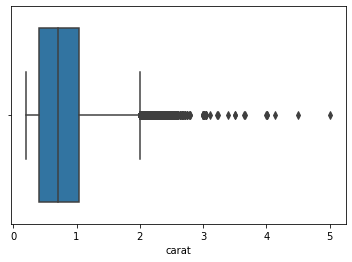

In [146]:
sns.boxplot(x = df_carat)

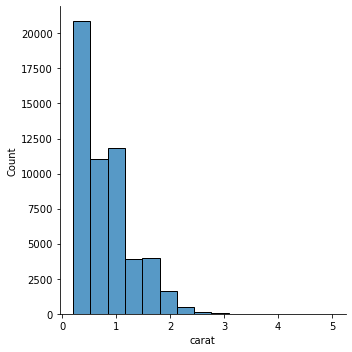

In [148]:
sns.displot(df_carat, bins = 15, kde = False)

In [149]:
df_carat_log = np.log(df_carat)

In [150]:
df_carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

<AxesSubplot:xlabel='carat'>

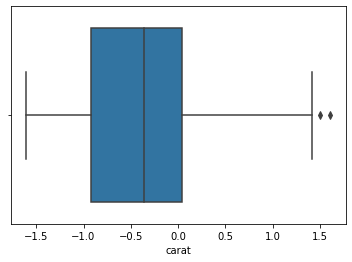

In [151]:
sns.boxplot(x = df_carat_log)

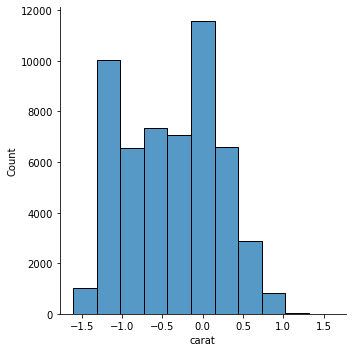

In [152]:
sns.displot(df_carat_log,  bins = 11, kde = False)

In [153]:
Q1 = df_carat.quantile(0.25)
Q3 = df_carat.quantile(0.75)
IQR = Q3-Q1

In [154]:
Q1

0.4

In [155]:
Q3

1.04

In [156]:
IQR

0.64

In [157]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [158]:
lower_lim

-0.5599999999999999

In [159]:
upper_lim

2.0

In [160]:
(df_carat < lower_lim) | (df_carat > upper_lim)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: carat, Length: 53940, dtype: bool

In [161]:
outliers_15 = (df_carat < lower_lim) | (df_carat > upper_lim)

In [162]:
df_carat[outliers_15]

12246    2.06
13002    2.14
13118    2.15
13757    2.22
13991    2.01
         ... 
27741    2.15
27742    2.04
27744    2.29
27746    2.07
27749    2.29
Name: carat, Length: 1889, dtype: float64

In [163]:
df_carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

In [164]:
Q1_log = df_carat_log.quantile(0.25)
Q3_log = df_carat_log.quantile(0.75)
IQR_log = Q3_log-Q1_log

In [165]:
lower_lim_log = Q1_log - 1.5 * IQR_log
upper_lim_log = Q3_log + 1.5 * IQR_log

In [166]:
lower_lim_log

-2.3495578994153097

In [167]:
upper_lim_log

1.472487880694436

In [168]:
(df_carat_log < lower_lim_log) | (df_carat_log > upper_lim_log)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: carat, Length: 53940, dtype: bool

In [169]:
outliers_15_log = (df_carat_log < lower_lim_log) | (df_carat_log > upper_lim_log)

In [170]:
df_carat[outliers_15_log]

27415    5.01
27630    4.50
Name: carat, dtype: float64

In [171]:
df["carat_log"] = np.log(df["carat"])

In [172]:
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [173]:
df.drop("carat", axis=1)

,depth,table,price,x,y,z,carat_log
0,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...
53935,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [174]:
df.drop("carat", axis=1)[outliers_15_log]

,depth,table,price,x,y,z,carat_log
27415,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [175]:
df.drop("carat", axis=1)[~outliers_15_log]

,depth,table,price,x,y,z,carat_log
0,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...
53935,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [176]:
cleaned_df = df.drop("carat", axis=1)[~outliers_15_log]

cleaned_df

,depth,table,price,x,y,z,carat_log
0,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...
53935,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8